In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Data Preprocessing


In [2]:

"""
This function loads CSV files, cleans the data: removing duplicates and filling missing values. 
It takes dataset_address and encoding as parameters and returns a cleaned dataframe.
"""

import pandas as pd

def load_clean_dataset(dataset_address, encoding='utf-8'):
    
    df = pd.read_csv(dataset_address, encoding=encoding, on_bad_lines='skip')
    
    df.drop_duplicates(inplace=True)
    
    for data in df.columns:
        if df[data].dtype == 'object':
            df[data].fillna(df[data].mode()[0], inplace=True)
        else:
            df[data].fillna(df[data].median(), inplace=True)
    
    return df

In [3]:
training_dataset ="C:\\Users\\user\\Downloads\\male_players (legacy).csv"
testing_dataset = "C:\\Users\\user\\Downloads\\players_22 (1).csv"

In [4]:
cleaned_train_df = load_clean_dataset(training_dataset)
cleaned_test_df = load_clean_dataset(testing_dataset)

C:\Users\user\AppData\Local\Temp\ipykernel_8268\3256625901.py:10: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_address, encoding=encoding, on_bad_lines='skip')
C:\Users\user\AppData\Local\Temp\ipykernel_8268\3256625901.py:10: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_address, encoding=encoding, on_bad_lines='skip')


In [5]:
# Display the first 5 rows of the cleaned DataFrame
cleaned_train_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [6]:
# Display the first 5 rows of the cleaned DataFrame
cleaned_test_df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [7]:
# Display the shape of the cleaned DataFrame
cleaned_train_df.shape

(161583, 110)

In [8]:
# Display the shape of the cleaned DataFrame
cleaned_test_df.shape

(19239, 110)

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
This method performs Exploratory Data Analysis on df dataFrame.
It takes df dataFrame as a parameter which contains data to be analyzed.
It focus on numeric columns through displaying dataset information and sumamry statistics, 
providing correlation heatmap for visualizing the relationships between pair of variables, 
and  creates scatterplot matrix for visualizing relationships between pairs across multiple variables.
It also generates the distribution of the target variable 'overall' rating column and
visualize the count of players by their preferred foot, if they are present. 
This illustrates how ratings are distributed among players.
"""

def conduct_EDA(df):
    num_df = df.select_dtypes(include='number')
    
    print("Dataset info:")
    print(num_df.info())
    
    print("\nSummary statistics:")
    print(num_df.describe())
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()
    
    sns.pairplot(num_df[['overall', 'age', 'height_cm', 'weight_kg', 'value_eur', 'wage_eur']])
    plt.suptitle('Pairplot of Numerical Variables', y=1.02)
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df['overall'], bins=20, kde=True)
    plt.title('Distribution of Overall Ratings')
    plt.xlabel('Overall Rating')
    plt.ylabel('Count')
    plt.show()
    
    if 'preferred_foot' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x='preferred_foot', data=df)
        plt.title('Count of Players by Preferred Foot')
        plt.xlabel('Preferred Foot')
        plt.ylabel('Count')
        plt.show()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Data columns (total 63 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   player_id                       161583 non-null  int64  
 1   fifa_version                    161583 non-null  int64  
 2   fifa_update                     161583 non-null  int64  
 3   overall                         161583 non-null  int64  
 4   potential                       161583 non-null  int64  
 5   value_eur                       161583 non-null  float64
 6   wage_eur                        161583 non-null  float64
 7   age                             161583 non-null  int64  
 8   height_cm                       161583 non-null  int64  
 9   weight_kg                       161583 non-null  int64  
 10  league_id                       161583 non-null  float64
 11  league_level                    161583 non-null  float64
 12  cl

C:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


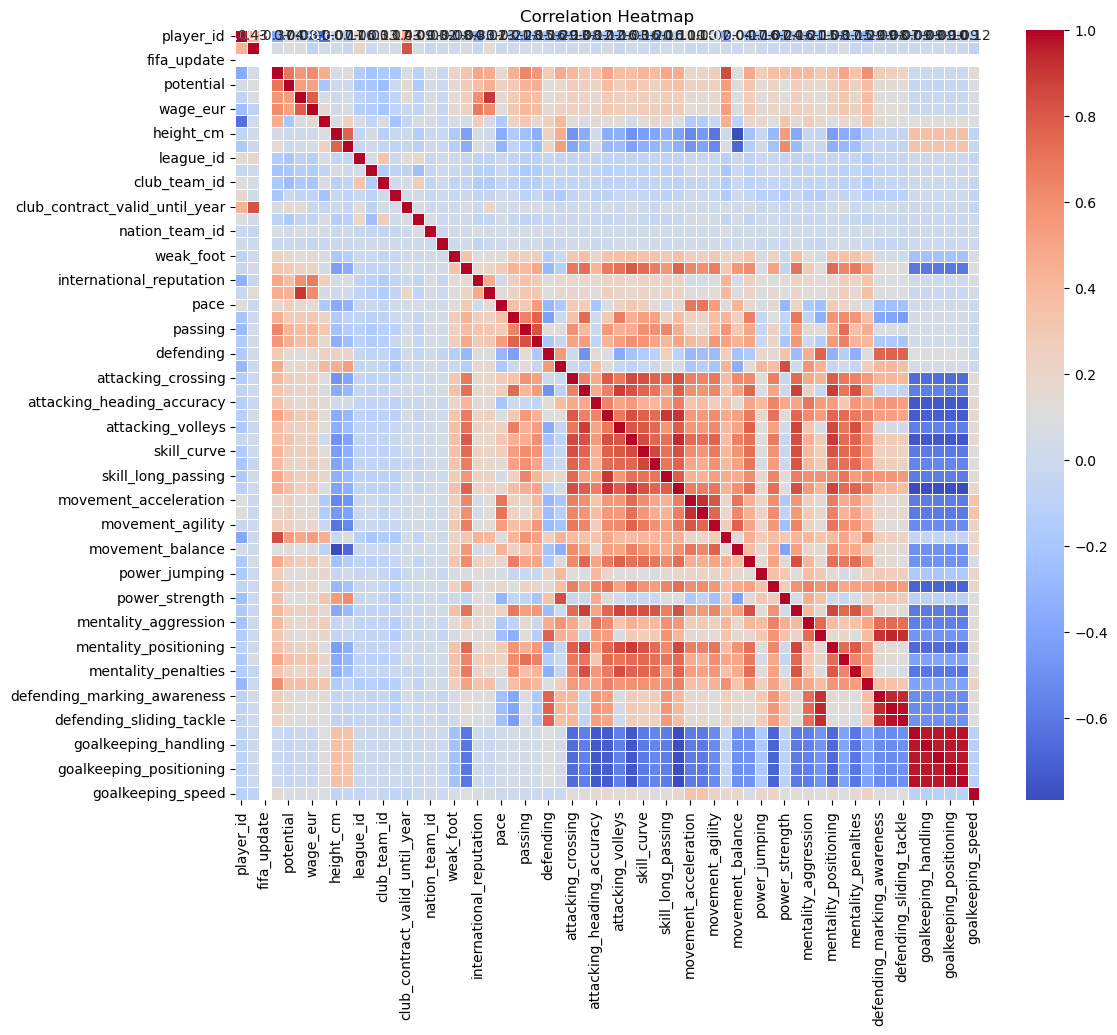

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

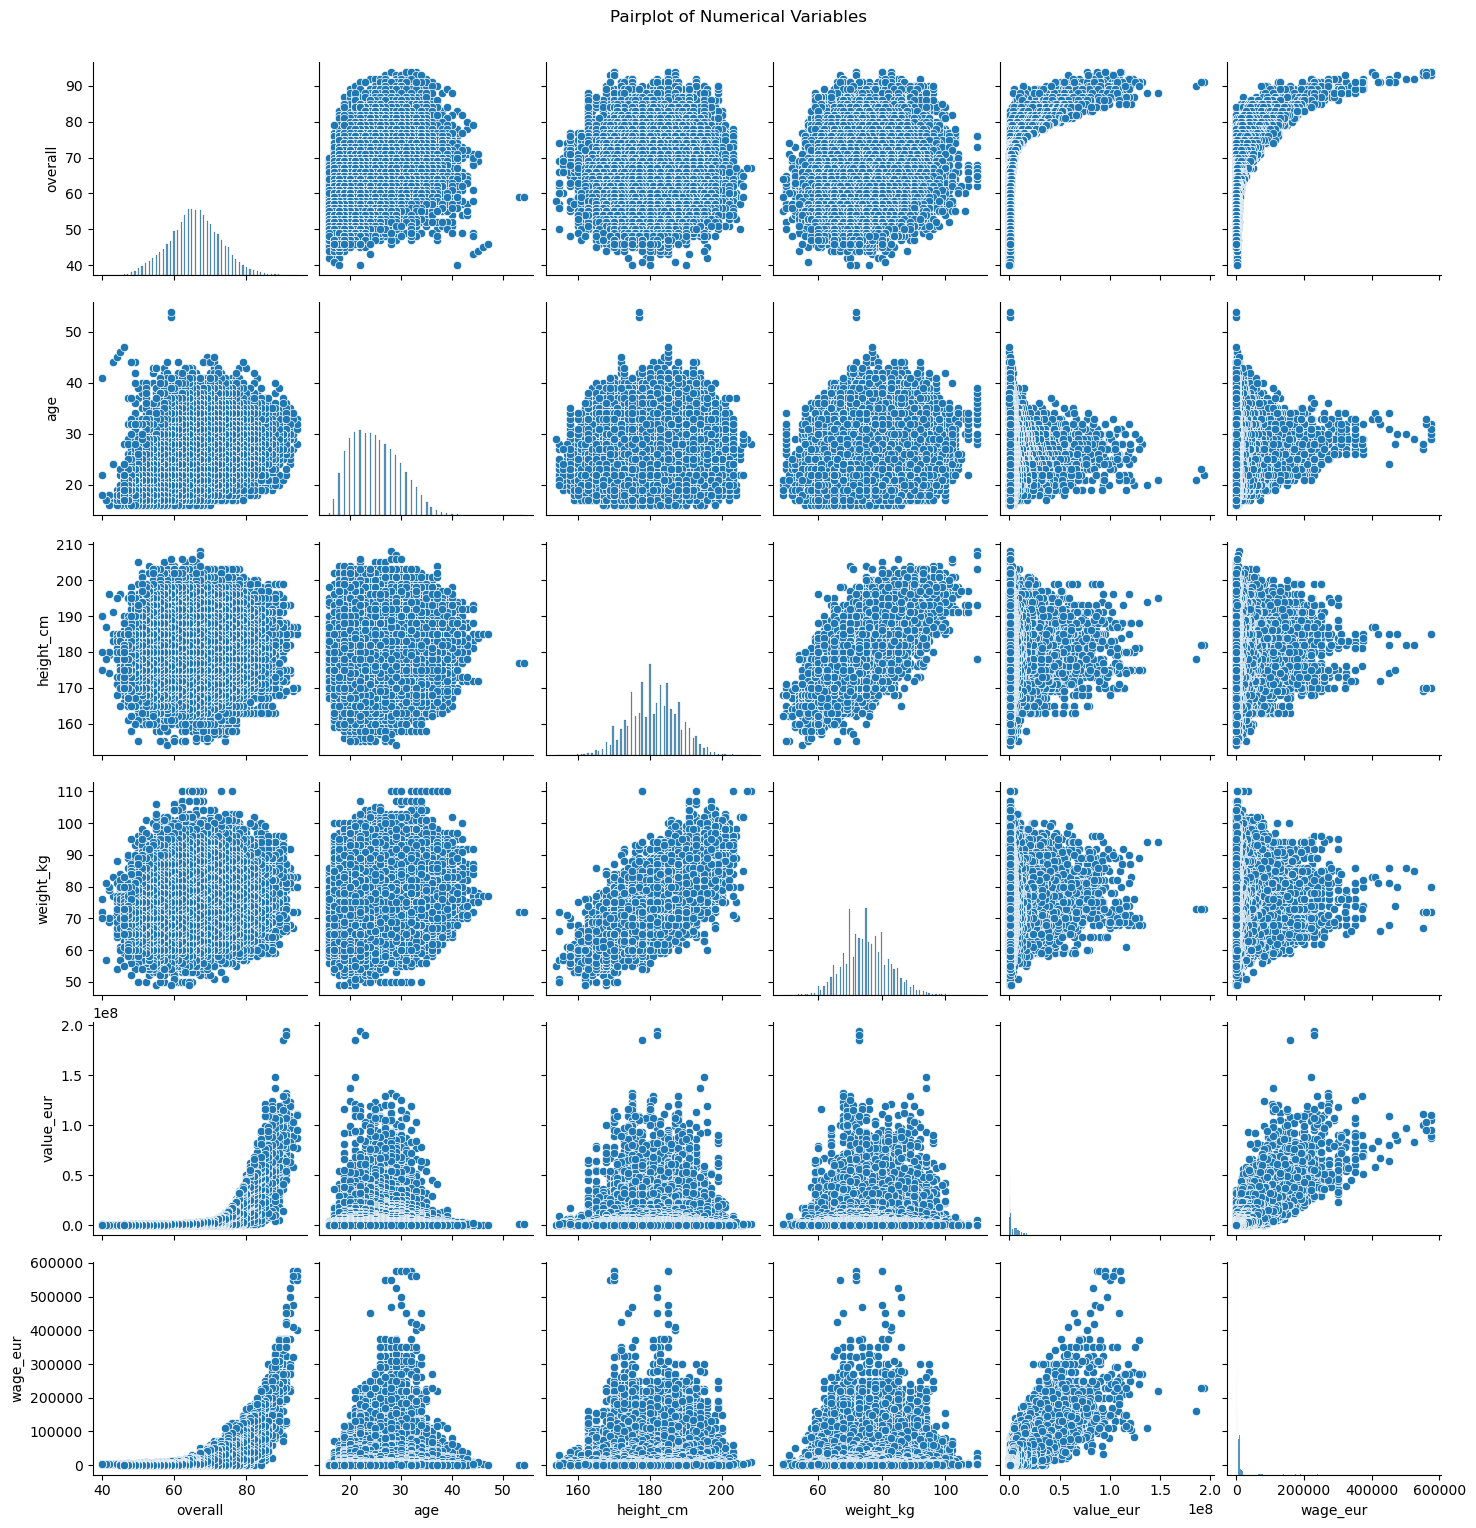

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


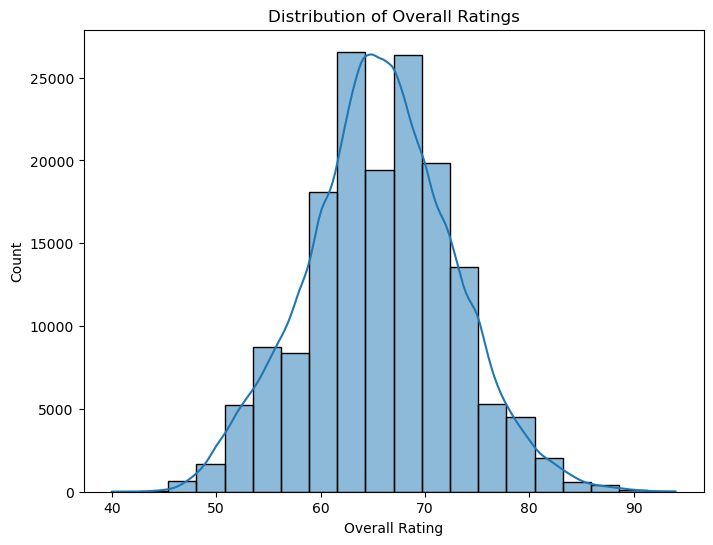

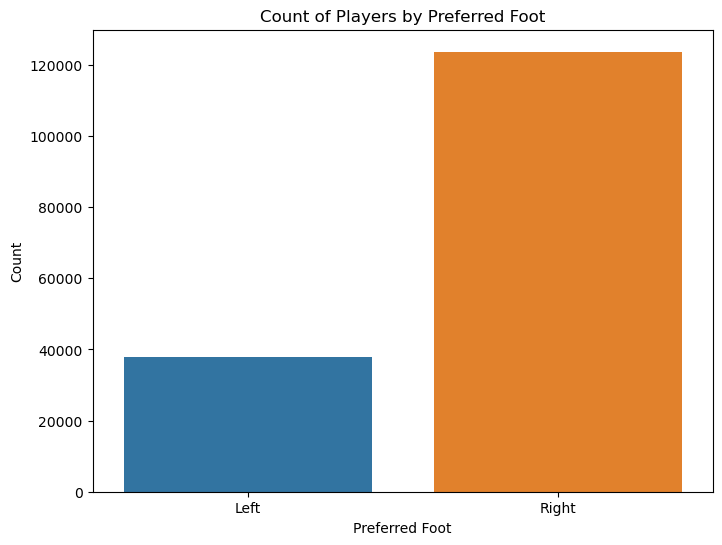

In [10]:
# Conduct EDA for cleaned train dataset
conduct_EDA(cleaned_train_df)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  int64  
 1   overall                      19239 non-null  int64  
 2   potential                    19239 non-null  int64  
 3   value_eur                    19239 non-null  float64
 4   wage_eur                     19239 non-null  float64
 5   age                          19239 non-null  int64  
 6   height_cm                    19239 non-null  int64  
 7   weight_kg                    19239 non-null  int64  
 8   club_team_id                 19239 non-null  float64
 9   league_level                 19239 non-null  float64
 10  club_jersey_number           19239 non-null  float64
 11  club_contract_valid_until    19239 non-null  float64
 12  nationality_id               19239 non-null  int64  
 13  na

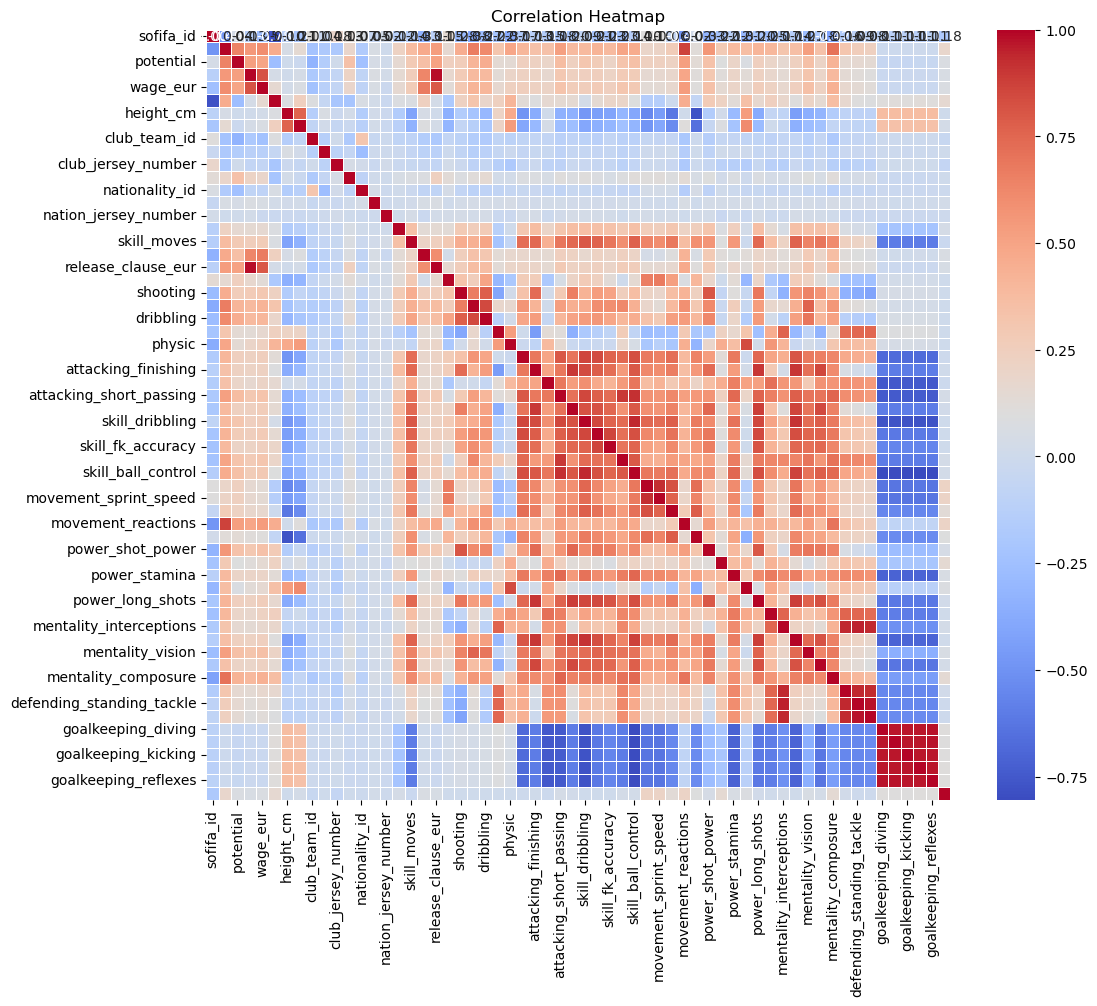

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

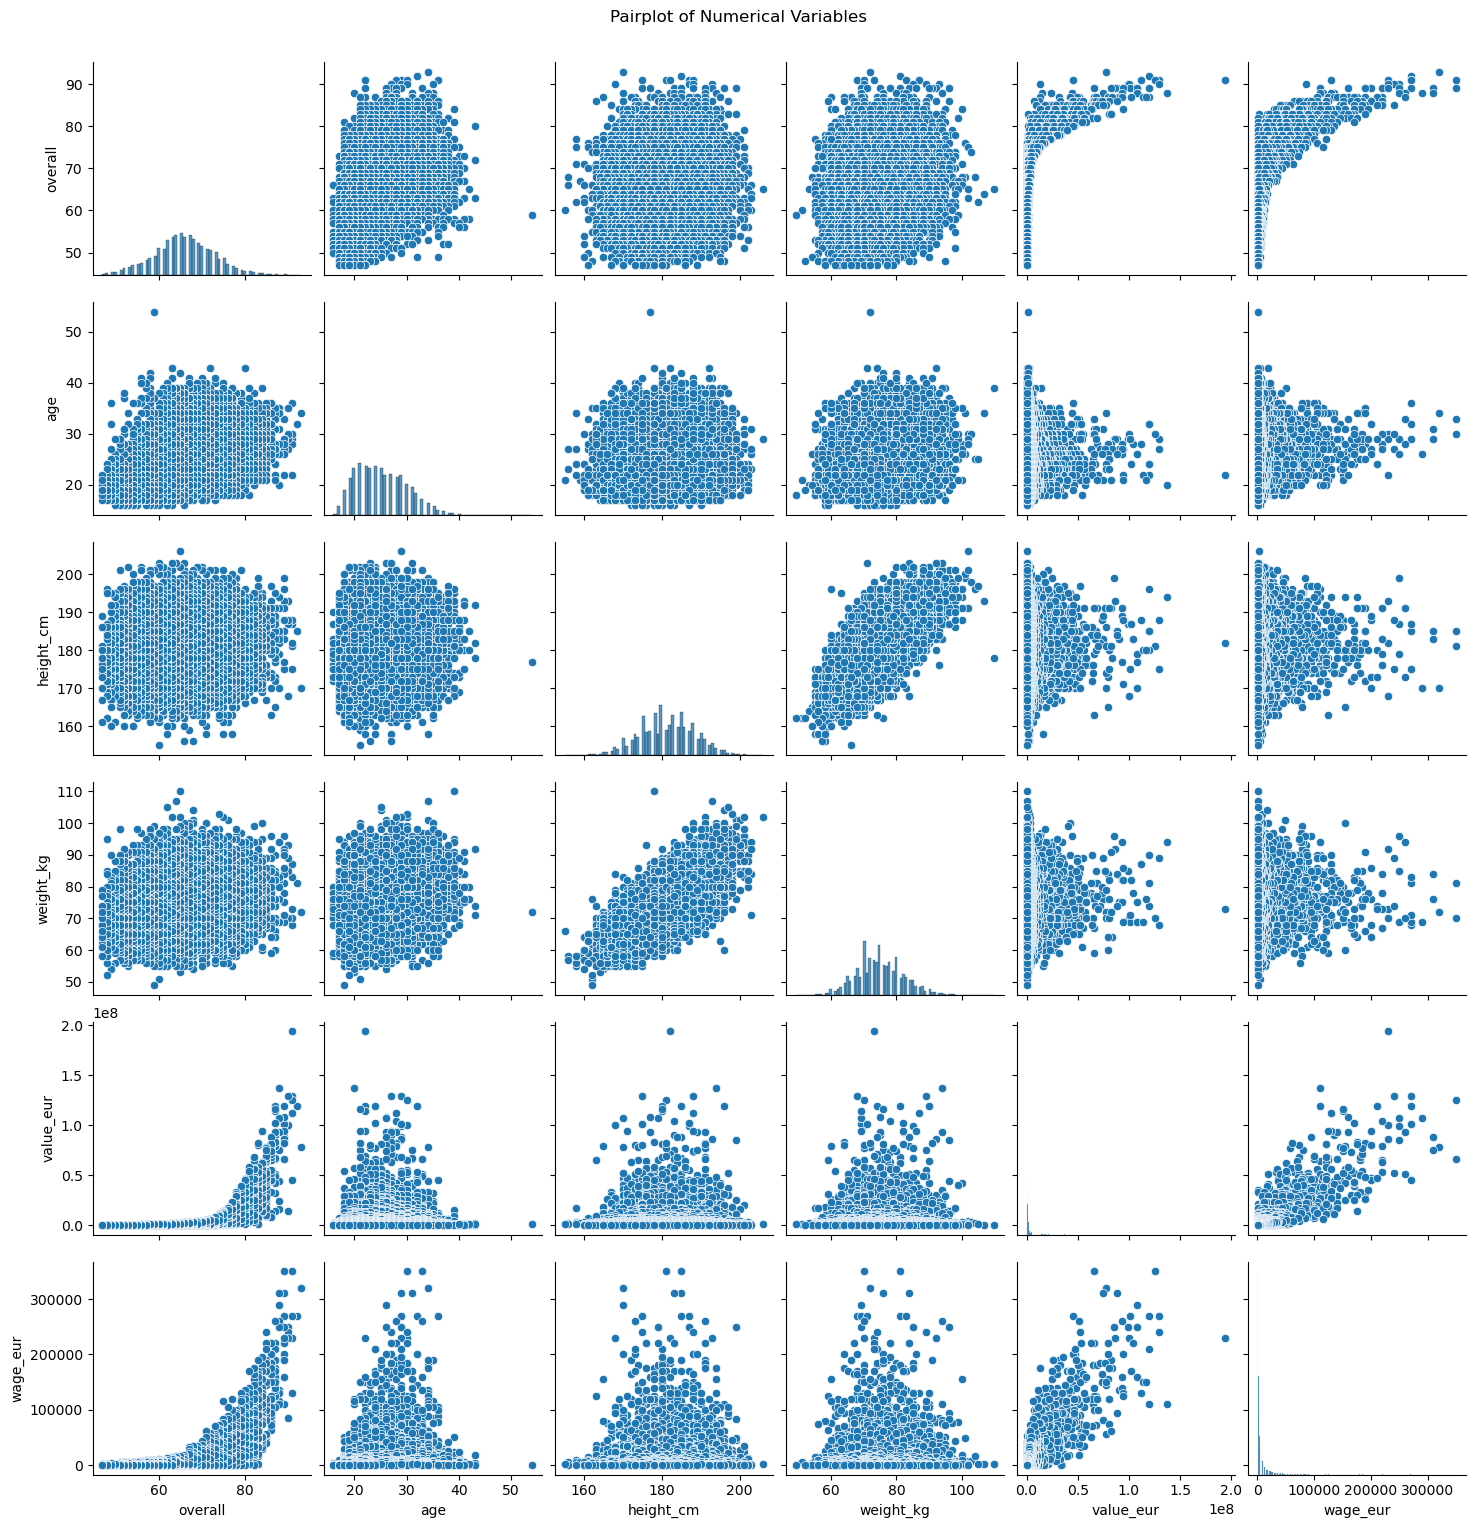

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


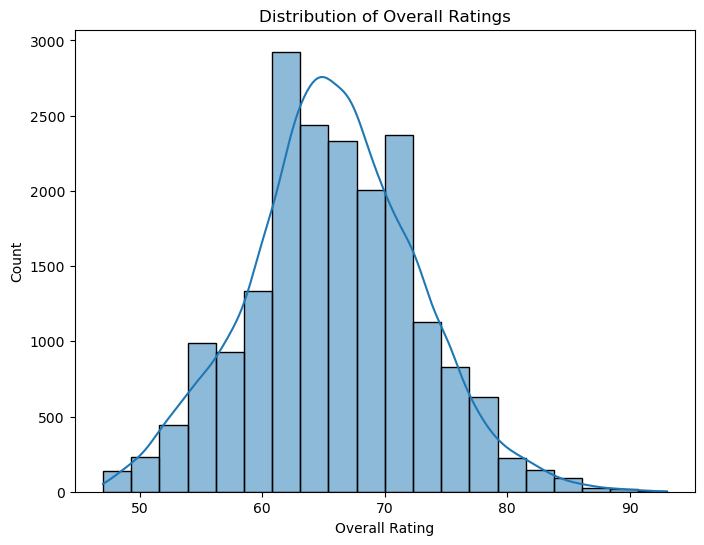

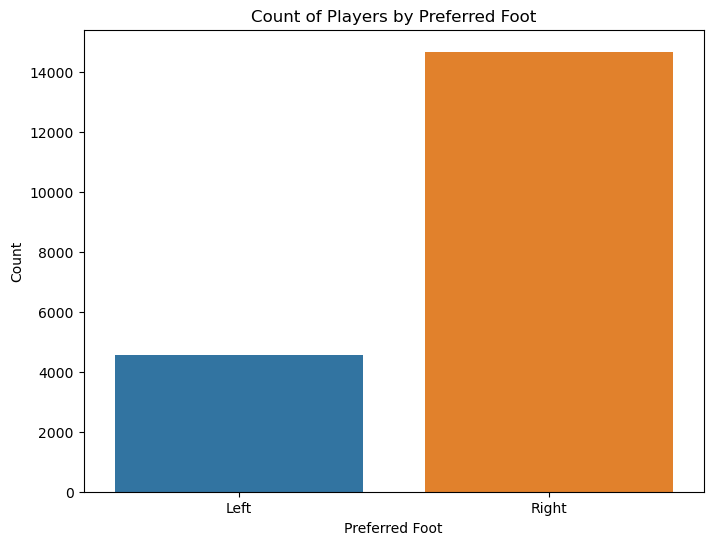

In [11]:
# Conduct EDA for cleaned test dataset
conduct_EDA(cleaned_test_df)

In [12]:
"""
This Function takes df dataframe as parameter and 
it removes useless variables and returns the DataFrame with the remaining columns.
"""
def feature_selection(df):
    print("Original columns:")
    print(df.columns)

    # List of useless variables.
    useless_variables = ['fifa_version', 'fifa_update', 'fifa_update_date', 'league_id', 'club_contract_valid_until_year']
    
    # Check which columns in useless_variables are not present in df.columns
    dropped_columns = [column for column in useless_variables if column in df.columns]
    
    if dropped_columns:
        df.drop(columns=dropped_columns, inplace=True)
        print(f"Dropped columns: {dropped_columns}")
    else:
        print("No useless variables are found in DataFrame.")
    
    # selecting all the remaining columns
    selected_features = df.columns.tolist() 
    
    return df[selected_features]

In [13]:
# Select features for the training dataset
selected_training_df = feature_selection(cleaned_train_df) 

# Select features for the testing dataset
selected_testing_df = feature_selection(cleaned_test_df)

Original columns:
Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)
Dropped columns: ['fifa_version', 'fifa_update', 'fifa_update_date', 'league_id', 'club_contract_valid_until_year']
Original columns:
Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
No useless variables are found in DataFrame.


### Feature Engineering


In [14]:
from sklearn.preprocessing import StandardScaler

"""
This function takes df dataFrame, target variable 'overall', and the threshols=0.2 as parameters.
It selects features that have a correlation coefficient above the threshold with the target variable.
It returns List of selected features based on correlation threshold.
"""

def choose_correlated_features(df, target='overall', threshold=0.2):
    num_df = df.select_dtypes(include=['number'])
    corr_matrix = num_df.corr()
    corr_with_target_variable = corr_matrix[target].abs().sort_values(ascending=False)
    selected_features = corr_with_target_variable[corr_with_target_variable >= threshold].index.tolist()
    
    return selected_features

In [15]:
from sklearn.preprocessing import StandardScaler

"""
This function ensures that numerical features in 
both training and testing datasets are scaled similarly using StandardScaler.
It takes Training DataFrame containing selected features, testing DataFrame containing selected features,
and List of feature names to scale as parameters and 
returns Scaled training DataFrame and Scaled testing DataFrame.
"""

def scale_features(train_df, test_df, features):
    
    scaler = StandardScaler()

    scaled_training_df = train_df.copy()
    scaled_testing_df = test_df.copy()

    scaled_testing_df = scaled_testing_df.reindex(columns=scaled_training_df.columns, fill_value=0)
    
    scaled_training_df[features] = scaler.fit_transform(selected_training_df[features])
    scaled_testing_df[features] = scaler.transform(scaled_testing_df[features])
    
    return scaled_training_df, scaled_testing_df


In [16]:
# Picking features correlated with 'overall' rating
selected_features = choose_correlated_features(selected_training_df, target='overall', threshold=0.2)

# Scale selected features
scaled_training_df, scaled_testing_df = scale_features(selected_training_df, selected_testing_df, selected_features)

### Training Models


In [17]:
# Training and Testing scaled datasets
X_train = scaled_training_df.drop('overall', axis=1) 
y_train = scaled_training_df['overall']  

X_test = scaled_testing_df.drop('overall', axis=1) 
y_test = scaled_testing_df['overall'] 


In [18]:
X_train.columns.tolist()

['player_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movem

In [19]:
"""
This function extracts and returns column names from the list 'categorical_variables'
that are present in the 'df' DataFrame.
"""

categorical_variables = [
    'player_url', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 
    'player_positions', 'dob', 'league_name', 'league_level', 'club_name', 
    'club_position', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 
    'nationality_id', 'nationality_name', 'nation_position', 'preferred_foot', 'weak_foot', 
    'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 
    'release_clause_eur', 'player_tags', 'player_traits', 'mentality_composure', 'player_face_url'
]

def find_categ_columns(df):
    new_categ_columns = []
    for column in categorical_variables:
        if column in df.columns:
            new_categ_columns.append(column)
            
    return new_categ_columns
            

In [20]:
new_columns_train = find_categ_columns(X_train)
new_columns_train

['player_url',
 'short_name',
 'long_name',
 'player_positions',
 'dob',
 'league_name',
 'league_level',
 'club_name',
 'club_position',
 'club_loaned_from',
 'club_joined_date',
 'nationality_id',
 'nationality_name',
 'nation_position',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'mentality_composure',
 'player_face_url']

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

"""
This method reduces the number of unique categorical values for preventing overfitting in models.
It gets the frequency distribution of the column and 
when the number of unique categorical values is greater than the threshold, 
it replaces less frequent values with 'Other'
"""
def reduce_unique_categ_values(df, categorical_variables, threshold=100):
    for column in categorical_variables:
        if column in df.columns:
            value_counts = df[column].value_counts()
            if len(value_counts) > threshold:
                categ_values_to_keep = value_counts.index[:threshold]
                df[column] = df[column].where(df[column].isin(categ_values_to_keep), 'Other')
    return df



In [22]:
"""
This method identifies and returns a list of column names from DataFrame 'df'
that are categorical basing on their data type or when they are categorical and
have a high number of unique categories relative to the total number of observations 'threshold'.
"""

def identify_categorical_columns(df, threshold=0.9):
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype == 'object' or (df[column].dtype == 'category' and len(df[column].cat.categories) > threshold * len(df)):
            categorical_columns.append(column)
    return categorical_columns



In [23]:
"""
This method performs one-hot-encoding on categorical columns in the a DataFrame 'df'
It takes DataFrame 'df' to be encoded and maximum number of unique categories '100' as parameters, 
and returns DataFrame 'df_encoded' after encoding of categorical columns.
"""

def one_hot_encode_dataframe(df, max_categories=100):

    df = df.apply(lambda col: col.astype(str) if col.dtype == 'object' or col.dtype == 'float' else col)
    
    categorical_columns = identify_categorical_columns(df)
    
    df = reduce_unique_categ_values(df, categorical_columns, threshold=max_categories)
    
    encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
    
    encoded_sparse_matrix = encoder.fit_transform(df[categorical_columns])
    
    encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_sparse_matrix, columns=encoder.get_feature_names_out(categorical_columns))
    
    numeric_df = df.select_dtypes(exclude=['object', 'category'])
    
    df_encoded = pd.concat([numeric_df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    
    return df_encoded

In [24]:
# Applying one-hot encoding
X_train_encoded = one_hot_encode_dataframe(X_train)
X_test_encoded = one_hot_encode_dataframe(X_test)

In [25]:
X_train_encoded

,height_cm,weight_kg,nationality_id,movement_acceleration,movement_balance,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,...,player_face_url_https://cdn.sofifa.net/players/225/252/21_120.png,player_face_url_https://cdn.sofifa.net/players/225/305/21_120.png,player_face_url_https://cdn.sofifa.net/players/225/356/21_120.png,player_face_url_https://cdn.sofifa.net/players/225/402/21_120.png,player_face_url_https://cdn.sofifa.net/players/225/591/21_120.png,player_face_url_https://cdn.sofifa.net/players/225/668/21_120.png,player_face_url_https://cdn.sofifa.net/players/225/701/21_120.png,player_face_url_https://cdn.sofifa.net/players/225/964/21_120.png,player_face_url_https://cdn.sofifa.net/players/253/336/19_120.png,player_face_url_https://cdn.sofifa.net/players/255/627/21_120.png
0,169,67,52,96,95,6,11,15,14,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,185,80,38,91,63,7,11,15,14,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180,80,34,93,91,10,8,11,5,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,195,95,46,74,41,13,15,10,9,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,193,92,21,58,35,87,85,92,90,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,180,73,155,67,66,9,13,13,12,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161579,188,83,155,54,48,6,14,8,13,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161580,181,73,25,66,65,8,9,7,14,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161581,175,68,25,59,60,13,12,14,7,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_test_encoded

,height_cm,weight_kg,club_joined_date,nationality_id,movement_acceleration,movement_balance,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,...,player_face_url_https://cdn.sofifa.net/players/246/396/22_120.png,player_face_url_https://cdn.sofifa.net/players/246/611/22_120.png,player_face_url_https://cdn.sofifa.net/players/246/614/22_120.png,player_face_url_https://cdn.sofifa.net/players/246/649/22_120.png,player_face_url_https://cdn.sofifa.net/players/246/682/22_120.png,player_face_url_https://cdn.sofifa.net/players/246/723/22_120.png,player_face_url_https://cdn.sofifa.net/players/247/205/22_120.png,player_face_url_https://cdn.sofifa.net/players/247/209/22_120.png,player_face_url_https://cdn.sofifa.net/players/247/213/22_120.png,player_face_url_https://cdn.sofifa.net/players/247/352/22_120.png
0,170,72,0,52,91,95,6,11,15,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,185,81,0,37,77,82,15,6,12,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,187,83,0,38,85,74,7,11,15,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,175,68,0,54,93,84,9,9,15,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,181,70,0,7,76,78,15,13,5,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,180,64,0,155,56,70,6,10,5,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19235,175,70,0,25,60,69,11,12,6,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19236,178,72,0,25,60,59,8,6,7,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19237,173,66,0,25,69,73,7,10,7,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Display the shape of the encoded training dataFrame
print(X_train_encoded.shape)
print(y_train.shape)

(161583, 7809)
(161583,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Initialize the regressor models
rand_forest_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)
grad_boost_regressor = GradientBoostingRegressor(random_state=42)

# List of models for iteration
models = [('Random Forest', rand_forest_regressor),
          ('XGBoost', xgb_regressor),
          ('Gradient Boosting', grad_boost_regressor)]

# Conduct cross-validation and evaluate models
for name, model in models:
    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='r2')
    print(f"{name} R^2 Score: {scores.mean():.4f} (±{scores.std():.4f})")

    # fit the model on the entire training set
    model.fit(X_train_encoded, y_train)


### Testing and Evaluation


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Instantiating the regressor models
rand_forest_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)
grad_boost_regressor = GradientBoostingRegressor(random_state=42)

# Training the models
rand_forest_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)
grad_boost_regressor.fit(X_train, y_train)

# Predict using trained models
rand_forest_predictions = rand_forest_regressor.predict(X_test)
xgb_predictions = xgb_regressor.predict(X_test)
grad_boost_predictions = grad_boost_regressor.predict(X_test)

# Evaluate the  performance
rand_forest_r2 = r2_score(y_test, rand_forest_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
grad_boost_r2 = r2_score(y_test, grad_boost_predictions)

rand_forest_mse = mean_squared_error(y_test, rand_forest_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
grad_boost_mse = mean_squared_error(y_test, grad_boost_predictions)

# Dislay performance metrics
print(f"Random Forest: R^2 = {rand_forest_r2:.4f}, MSE = {rand_forest_mse:.4f}")
print(f"XGBoost: R^2 = {xgb_r2:.4f}, MSE = {xgb_mse:.4f}")
print(f"Gradient Boosting: R^2 = {grad_boost_r2:.4f}, MSE = {grad_boost_mse:.4f}")